# 4. Exploration and Analysis

We now have created three CSV files, in which our data are split. Because we are missing a larger portion of data from before 1987 and after 2024, we have split our data in three files:
1. Containing data from before 1987
2. Containing data from 1987 to 2017
3. Containing data from 1987 to 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
# Load new combined CSV's with data

df_before_1987 = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/notebooks/data%20between%201952%20and%202024.csv') #insert
df_1987_2017 = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/notebooks/data%20between%201987%20and%202017.csv') #insert PRIMARY
df_1987_2024 = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/notebooks/data%20after%201987.csv') #insert

In [3]:
columns_corr = df_1987_2017.columns.difference(['Date'])
columns_corr

Index(['CPIAUCSL', 'Change % Gold', 'Close Gold', 'Close Oil',
       'Close RUSSELL2000', 'Close SP500', 'High Gold', 'High RUSSELL2000',
       'High SP500', 'Inflation Rate', 'Interest Rate', 'Low Gold',
       'Low RUSSELL2000', 'Low SP500', 'Open Gold', 'Open RUSSELL2000',
       'Open SP500', 'Unemployment Rate', 'Volume RUSSELL2000',
       'Volume SP500'],
      dtype='object')

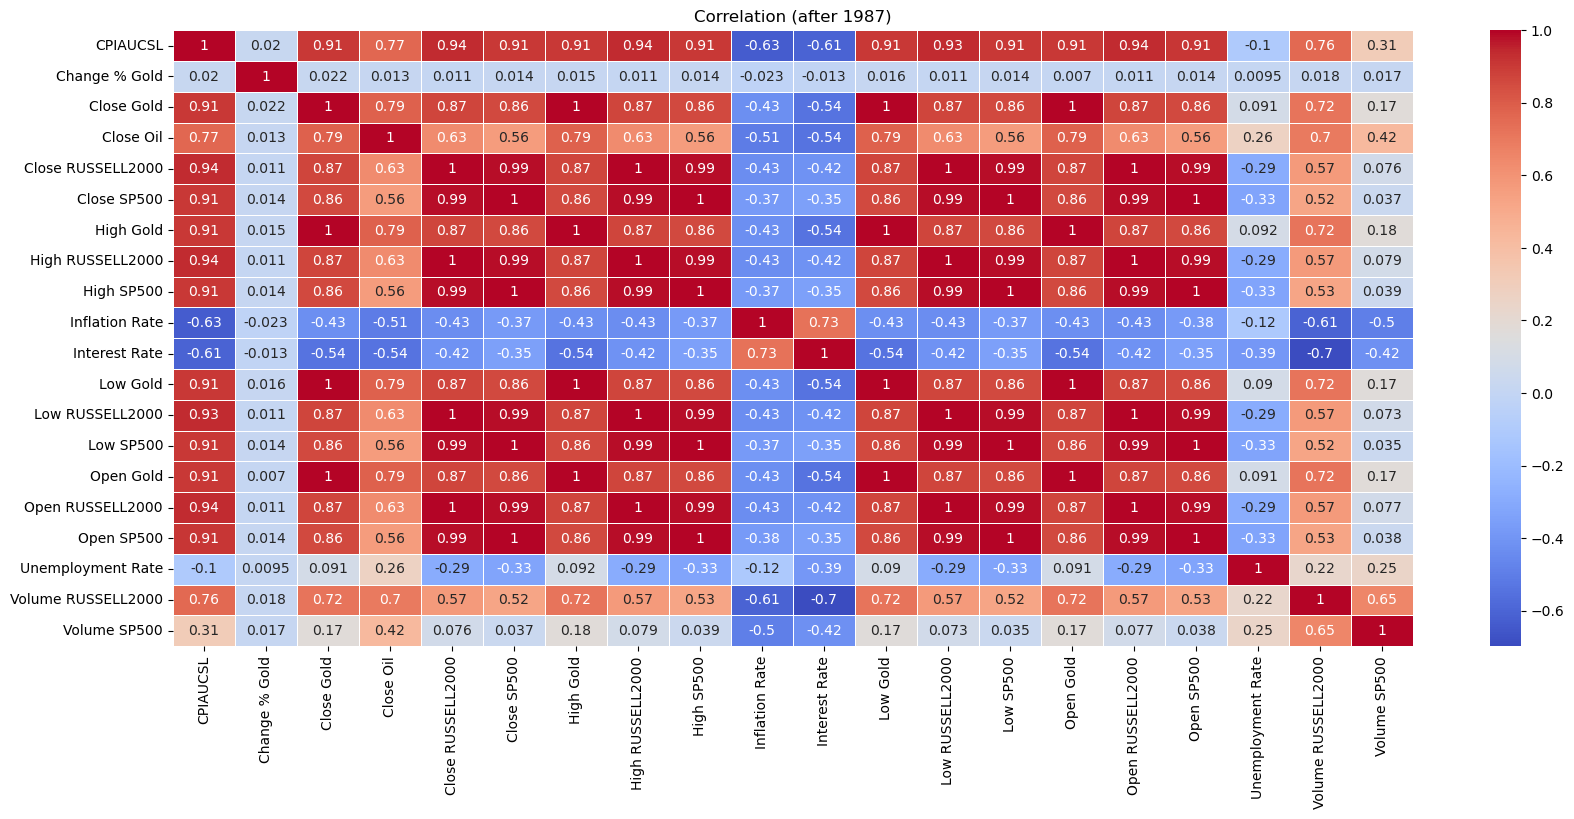

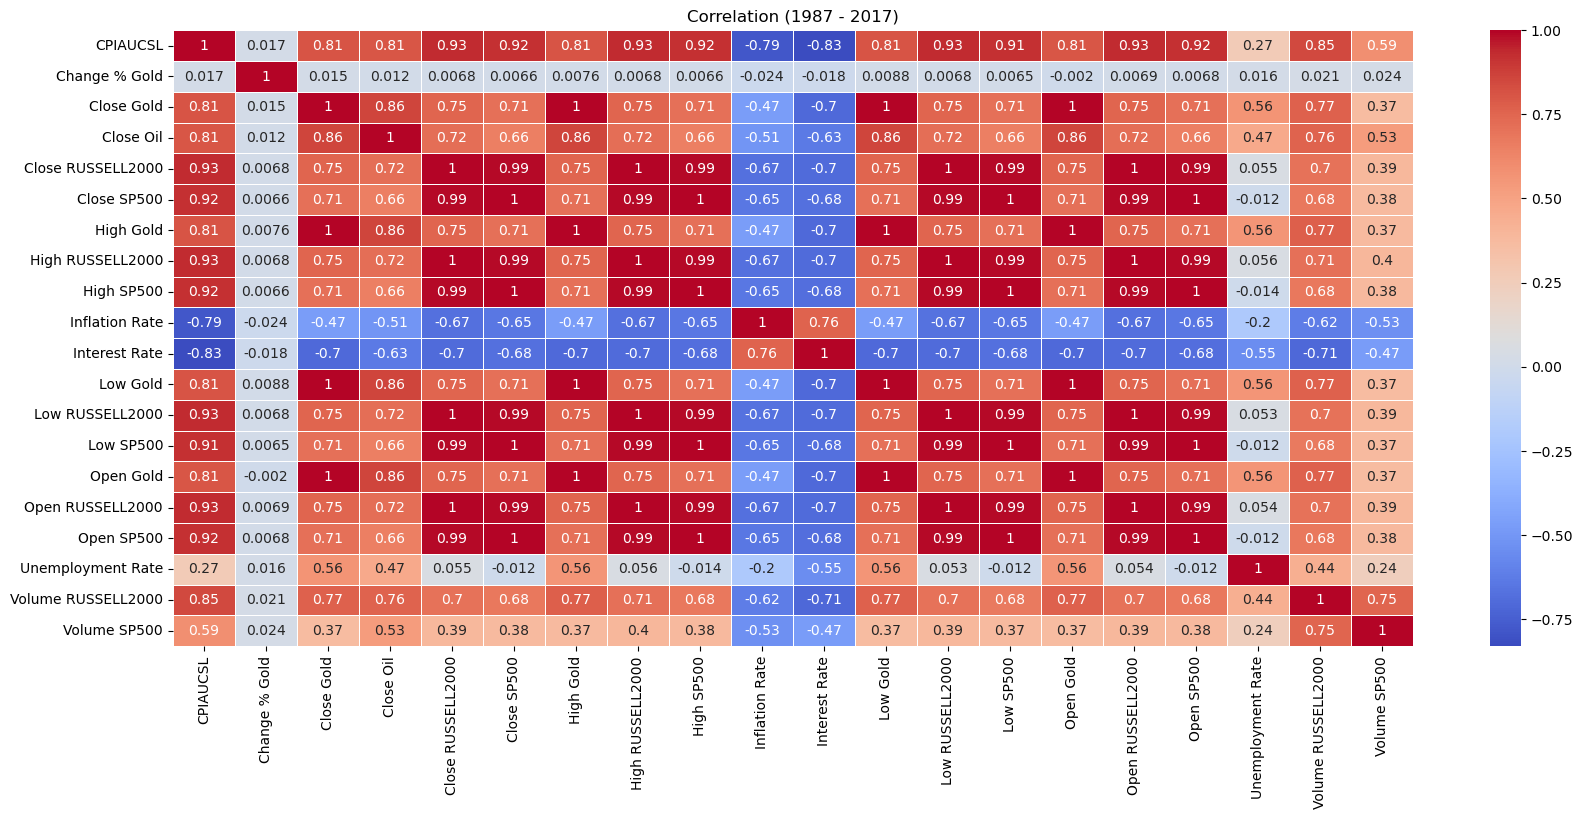

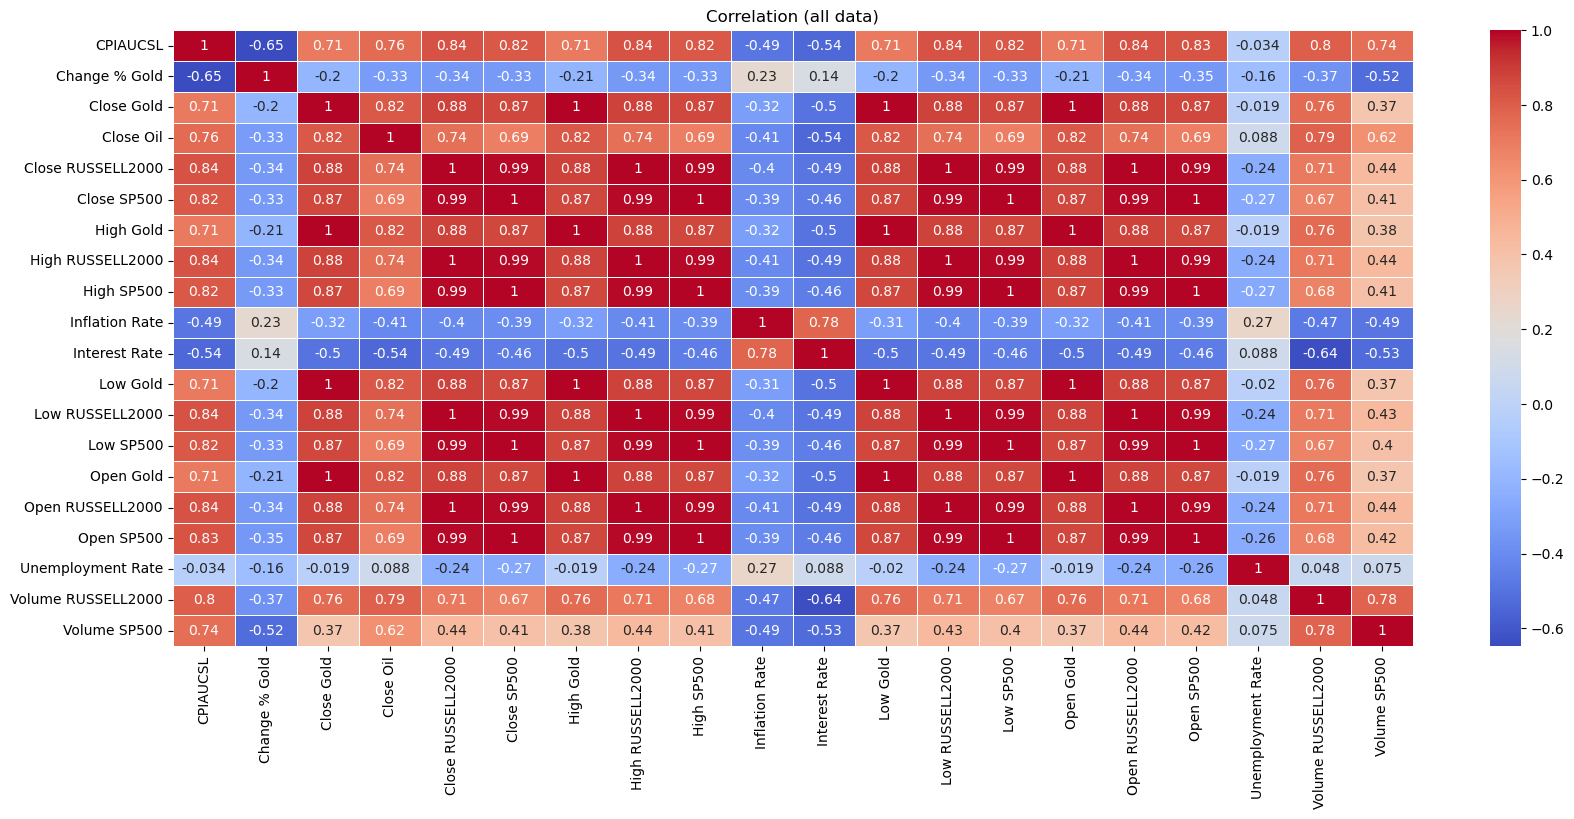

In [4]:
plt.figure(figsize=(20, 8))
corrmatt_after_1987 = df_1987_2024[columns_corr].corr()
sns.heatmap(corrmatt_after_1987, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (after 1987)')
plt.show()

plt.figure(figsize=(20, 8))
corrmatt_after_1987_till_2017 = df_1987_2017[columns_corr].corr()
sns.heatmap(corrmatt_after_1987_till_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987 - 2017)')
plt.show()

plt.figure(figsize=(20, 8))
corrmatt_all_data = df_before_1987[columns_corr].corr()
sns.heatmap(corrmatt_all_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (all data)')
plt.show()

In [5]:
df_before_1987.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16134 entries, 0 to 16133
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close SP500         16134 non-null  float64
 1   Open SP500          16134 non-null  float64
 2   High SP500          16134 non-null  float64
 3   Low SP500           16134 non-null  float64
 4   Volume SP500        16134 non-null  float64
 5   Interest Rate       16134 non-null  float64
 6   Unemployment Rate   16134 non-null  float64
 7   Inflation Rate      16134 non-null  float64
 8   CPIAUCSL            16134 non-null  float64
 9   Open RUSSELL2000    16134 non-null  float64
 10  High RUSSELL2000    16134 non-null  float64
 11  Low RUSSELL2000     16134 non-null  float64
 12  Close RUSSELL2000   16134 non-null  float64
 13  Volume RUSSELL2000  16134 non-null  float64
 14  Close Oil           16134 non-null  float64
 15  Close Gold          16134 non-null  float64
 16  Open

## Data overview
Let's see how the data looks in a line plot for the data frame df_1987_2017.

<Axes: xlabel='Date'>

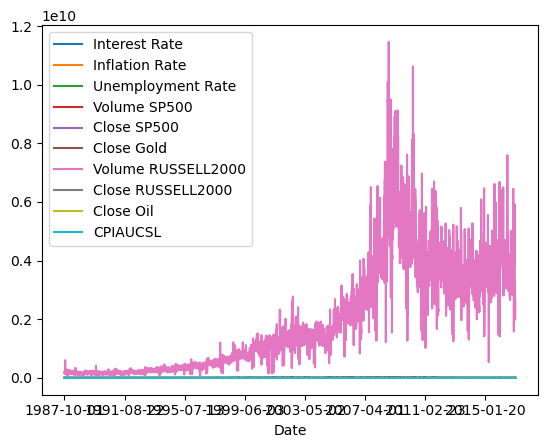

In [6]:
df_1987_2017.plot.line(y=['Interest Rate', 'Inflation Rate', 'Unemployment Rate', 'Volume SP500', 'Close SP500', 'Close Gold', 'Volume RUSSELL2000', 'Close RUSSELL2000', 'Close Oil', 'CPIAUCSL'] , x='Date')

We have big diffences in the our graphs, and high numbers for some data makes other data unreadable in this plot. That suggest we might have to normalize our data at some point to make et more comparable.

## Normalization
We want to normalize our data to be able to better compare it, and then see in a line plot again.

In [7]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Extract 'Date' column and keep it separate
date_column = df_1987_2017['Date']

# Scale the rest of the columns except 'Date'
df_1987_2017_scaled = scaler.fit_transform(df_1987_2017.drop(columns=['Date']))

# Convert the scaled data back into a DataFrame
# Use the original column names except for 'Date'
df_1987_2017_scaled = pd.DataFrame(df_1987_2017_scaled, columns=df_1987_2017.columns.drop('Date'))

# Concatenate the 'Date' column back to the scaled DataFrame
df_1987_2017_scaled = pd.concat([date_column, df_1987_2017_scaled], axis=1)

# Display the first few rows of the scaled DataFrame
df_1987_2017_scaled.head()

,Date,Close SP500,Open SP500,High SP500,Low SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,...,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,Open Gold,High Gold,Low Gold,Change % Gold
0,1987-10-01,0.035319,0.029408,0.034437,0.036013,0.101192,0.738241,0.354839,0.74,0.0,...,0.050444,0.050705,0.050952,0.011931,0.069707,0.122093,0.123146,0.120409,0.124916,0.374038
1,1987-10-02,0.035829,0.030793,0.035367,0.037452,0.107882,0.738241,0.354839,0.74,0.0,...,0.050980,0.051605,0.051482,0.011571,0.070819,0.122950,0.122994,0.121254,0.125793,0.451514
2,1987-10-05,0.035833,0.031152,0.035348,0.037453,0.106223,0.738241,0.354839,0.74,0.0,...,0.051338,0.052145,0.051841,0.008992,0.071783,0.124141,0.123964,0.122429,0.127011,0.457671
3,1987-10-06,0.033505,0.030882,0.034678,0.035866,0.122658,0.738241,0.354839,0.74,0.0,...,0.051392,0.050611,0.050024,0.010387,0.070449,0.124256,0.124890,0.122543,0.127129,0.437660
4,1987-10-07,0.033217,0.028907,0.032887,0.034703,0.119889,0.738241,0.354839,0.74,0.0,...,0.049518,0.049320,0.048979,0.011326,0.070300,0.124627,0.125411,0.122908,0.127509,0.442278


<Axes: xlabel='Date'>

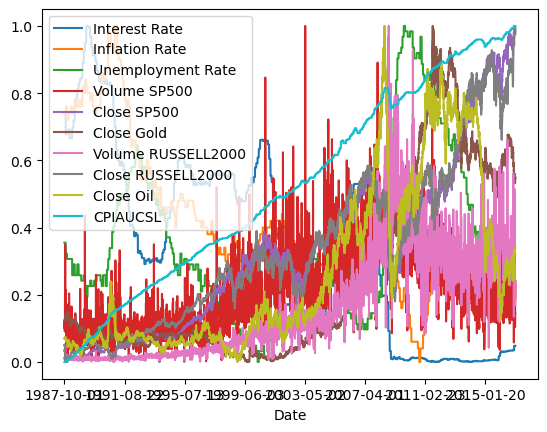

In [8]:
# Line plot of the scaled data set
df_1987_2017_scaled.plot.line(y=['Interest Rate', 'Inflation Rate', 'Unemployment Rate', 'Volume SP500', 'Close SP500', 'Close Gold', 'Volume RUSSELL2000', 'Close RUSSELL2000', 'Close Oil', 'CPIAUCSL'] , x='Date')

## Data distribution
Now let's have a look at histograms for our data.

In [9]:
df_1987_2017.describe()

,Close SP500,Open SP500,High SP500,Low SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,Open Gold,High Gold,Low Gold,Change % Gold
count,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,31.972880,31.916387,32.344746,31.576726,6.911791e+06,3.444709,6.000160,2.601600,182.016731,540.082252,543.693180,536.130860,540.217398,1.891231e+09,45.199609,656.911309,657.205033,660.523987,653.145417,0.017649
std,19.676993,19.733510,19.855109,19.487679,3.655362e+06,2.743893,1.493237,1.040665,37.525202,313.312671,315.322347,311.092053,313.361469,1.784767e+09,33.861293,439.234299,439.003041,443.872339,434.366295,1.000587
min,6.374125,5.738150,6.469042,6.158590,8.535742e+05,0.070000,3.800000,0.600000,115.000000,105.459999,106.519997,105.459999,106.080002,5.720000e+07,9.100000,252.550000,252.350000,252.550000,252.550000,-8.490000
25%,12.783908,12.780337,12.895425,12.660323,3.847917e+06,0.370000,5.000000,1.900000,150.500000,260.259995,260.790009,259.395005,260.277496,3.152725e+08,18.450000,350.750000,351.225000,350.750000,350.750000,-0.440000
50%,30.586941,30.595221,31.068908,30.093133,6.284100e+06,3.500000,5.600000,2.300000,179.500000,479.365005,482.945007,474.509995,479.535004,1.271750e+09,28.330000,398.215000,399.025000,398.215000,398.215000,0.000000
75%,42.608881,42.608903,43.056460,42.161558,9.121011e+06,5.490000,6.800000,2.900000,217.281000,736.505005,742.152512,729.585022,736.575012,3.323295e+09,66.750000,992.787500,992.225000,999.000000,983.600000,0.500000
max,84.556720,84.502996,85.317837,83.783470,2.984366e+07,9.850000,10.000000,5.600000,242.637000,1387.780029,1392.709961,1383.239990,1388.069946,1.145623e+10,143.950000,1898.100000,1903.400000,1921.110000,1860.910000,11.000000


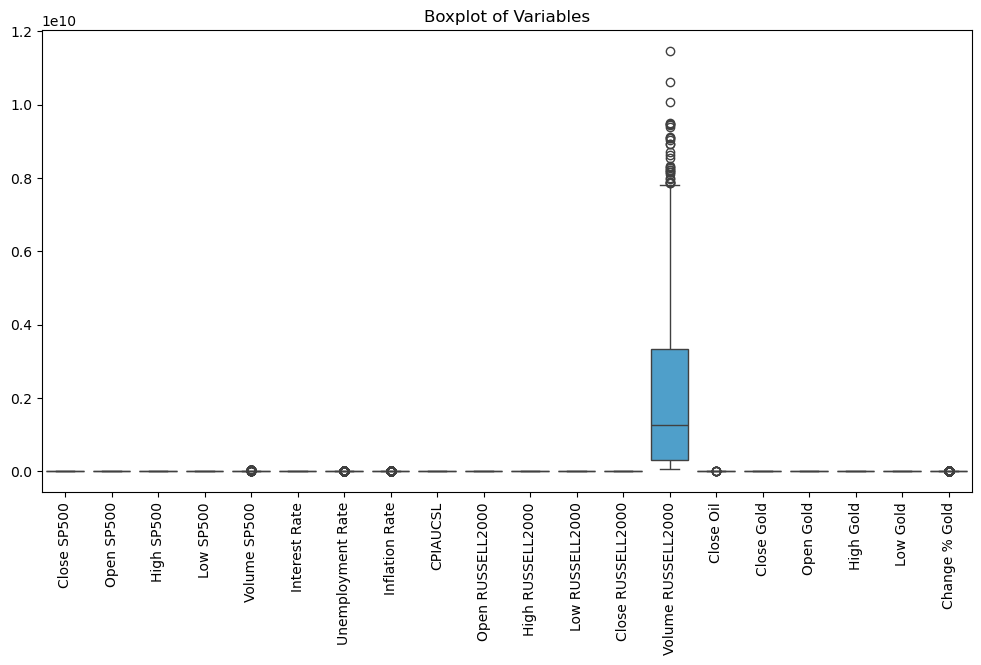

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_1987_2017.drop(columns=['Date']))
plt.title('Boxplot of Variables')
plt.xticks(rotation=90)
plt.show()

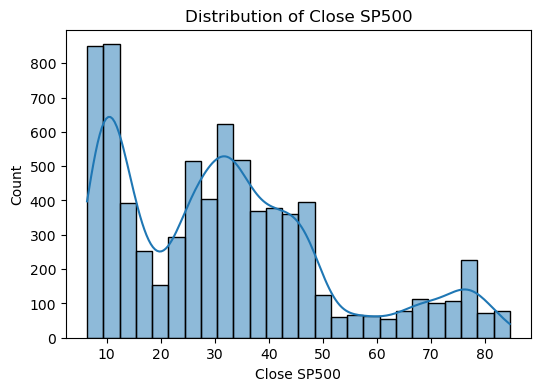

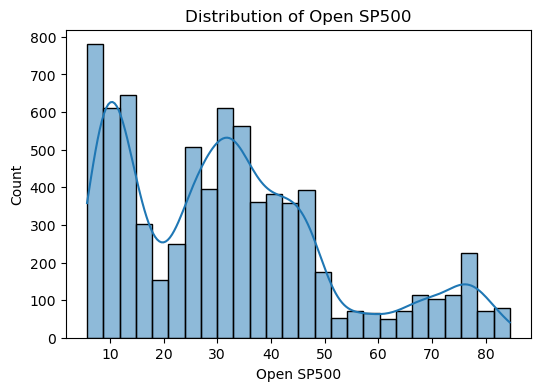

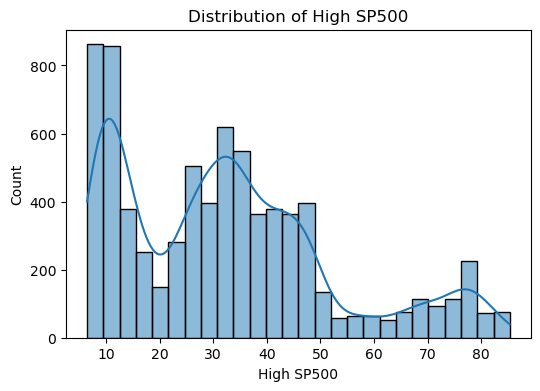

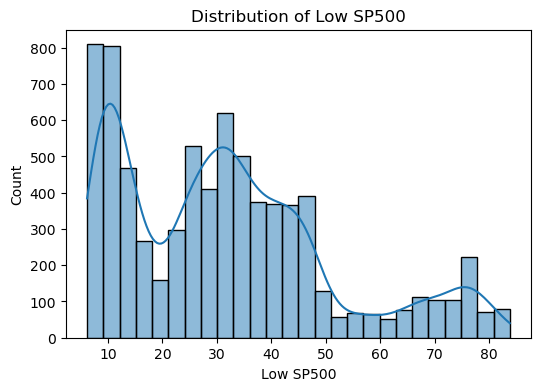

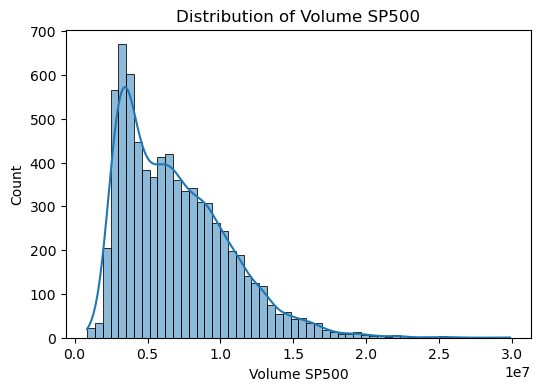

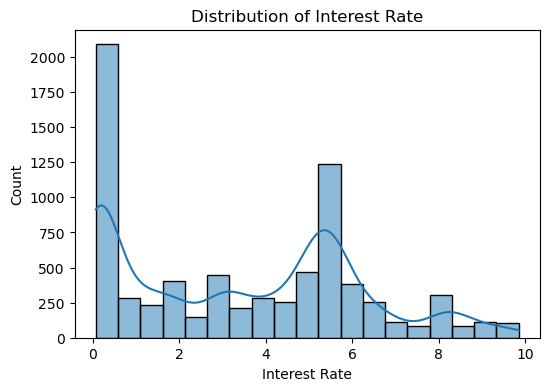

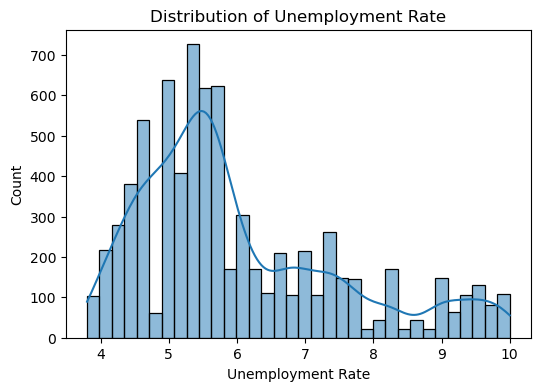

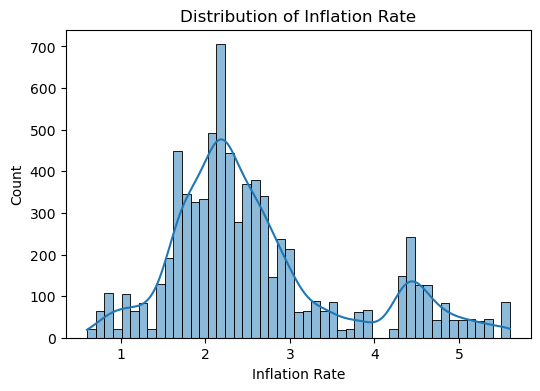

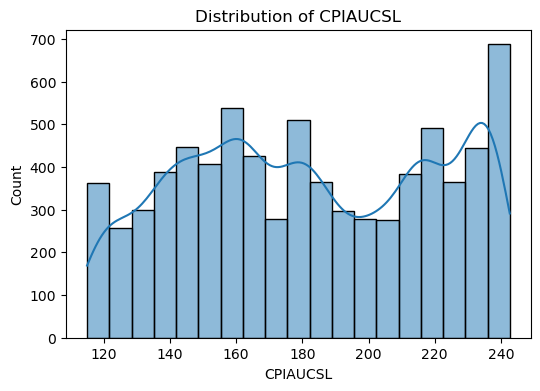

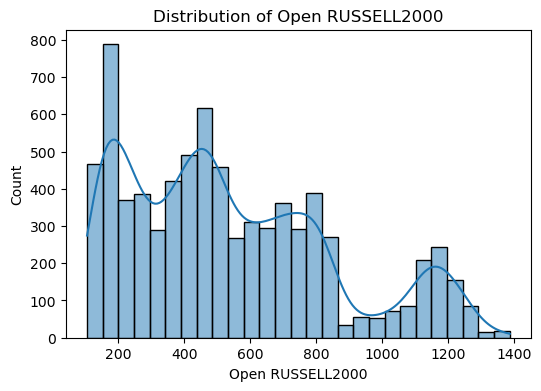

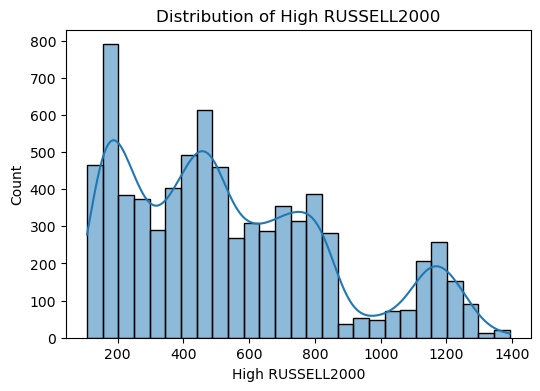

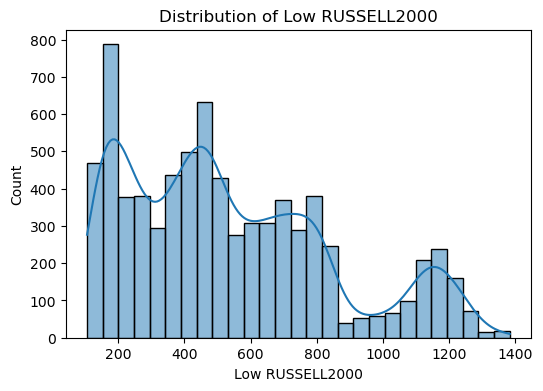

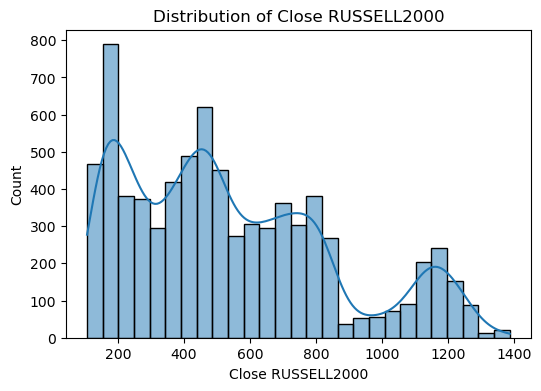

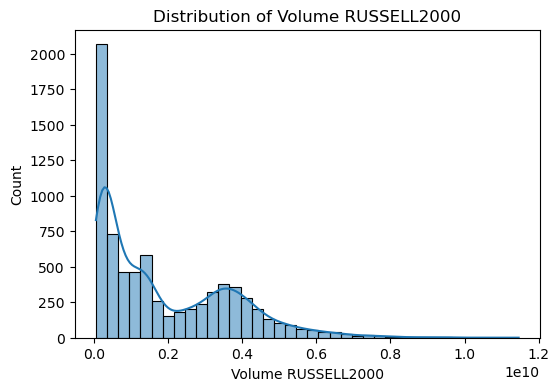

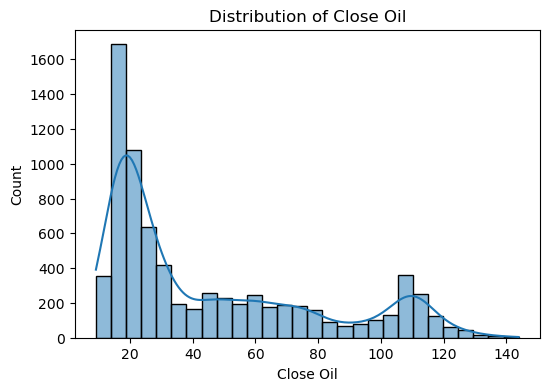

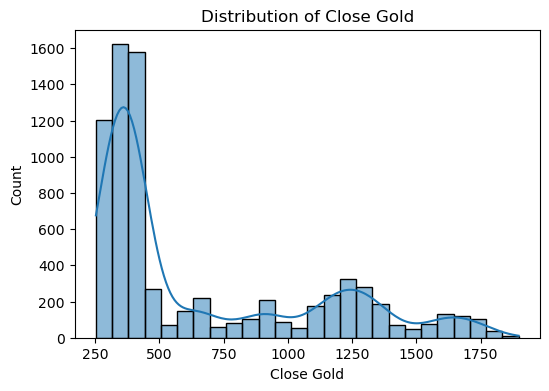

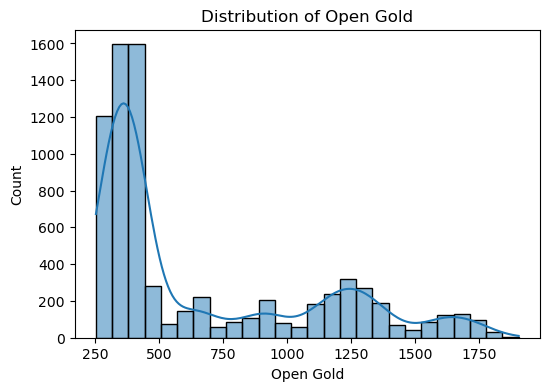

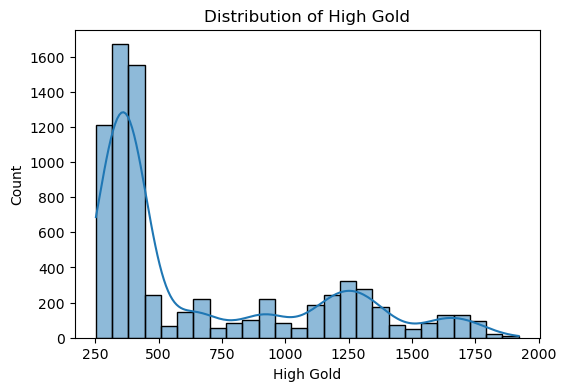

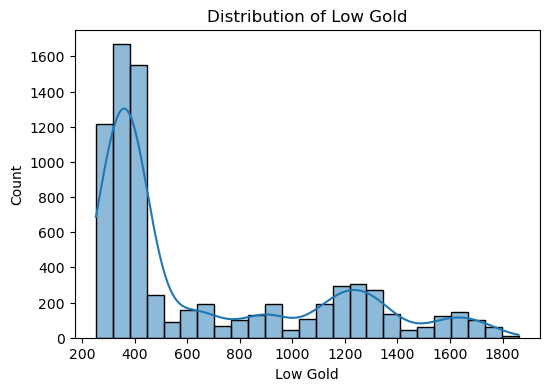

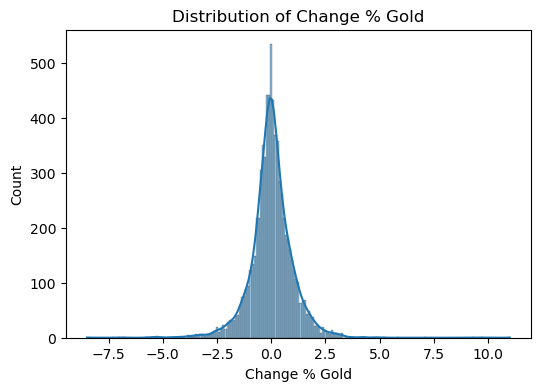

In [11]:
# Columns to check
columns_to_check = df_1987_2017.drop(columns=['Date'])

# Plot histogrammer for hver kolonne
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_1987_2017[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Comment something about the histograms

### Outliers
Now let's have a look at outliers in our data.

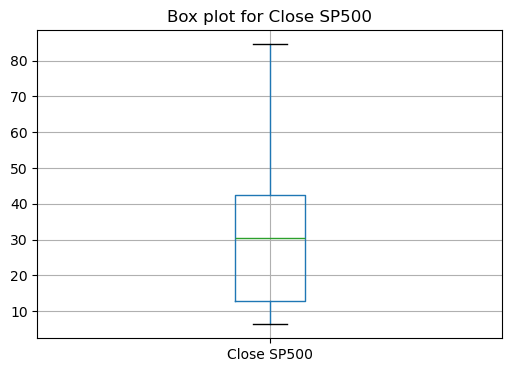

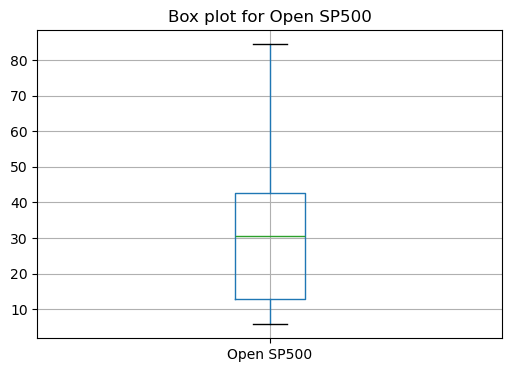

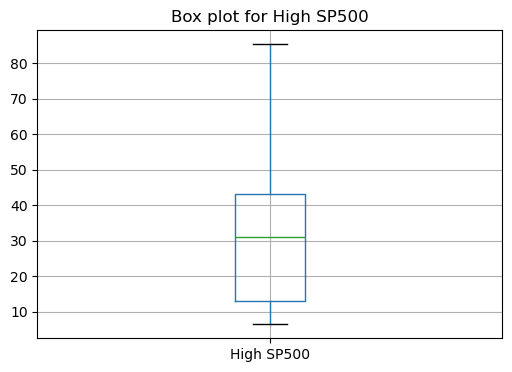

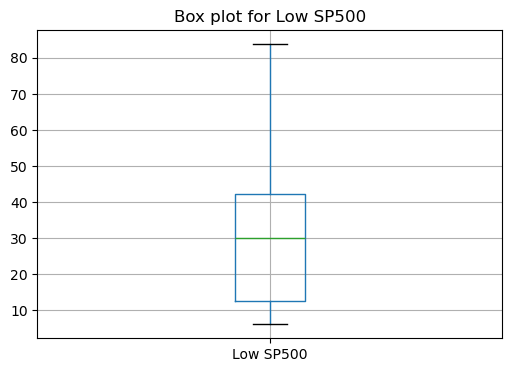

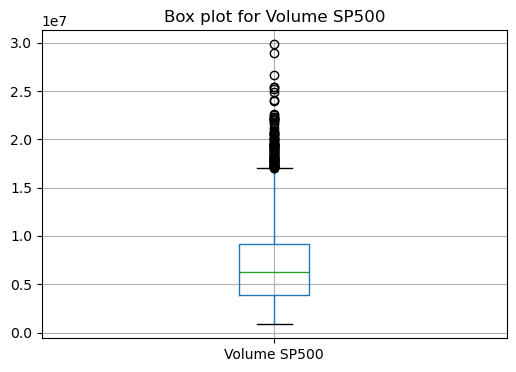

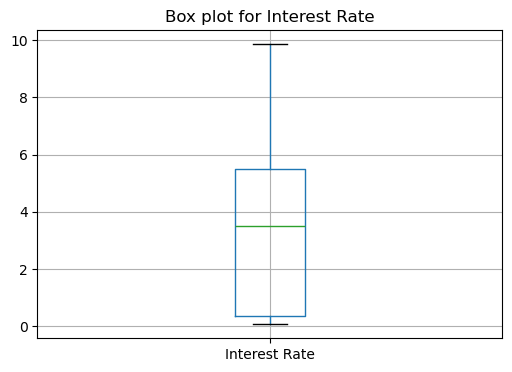

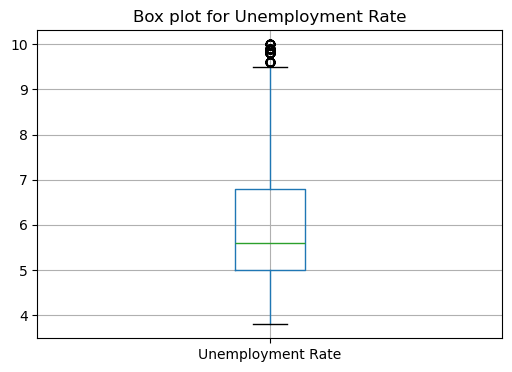

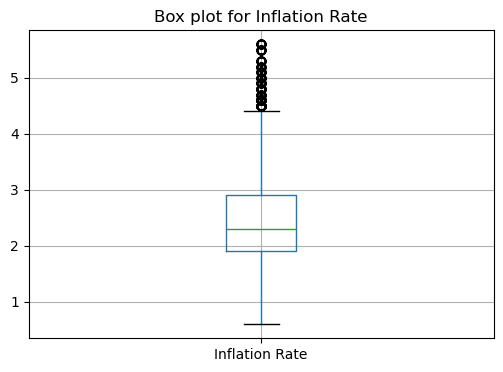

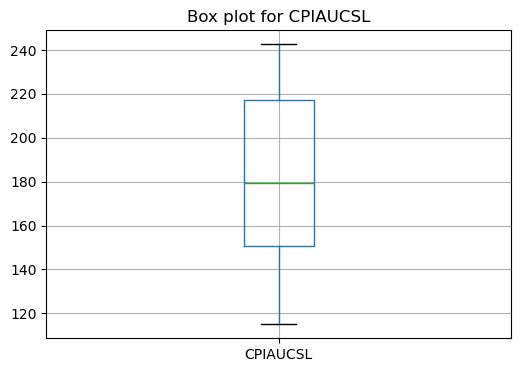

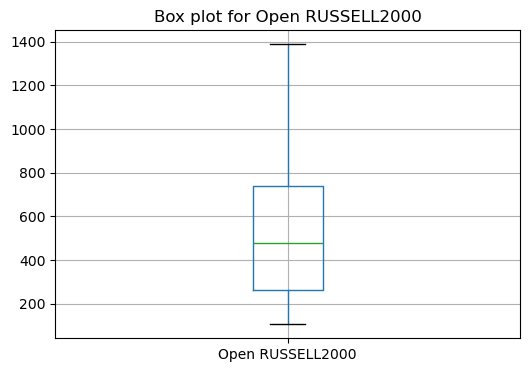

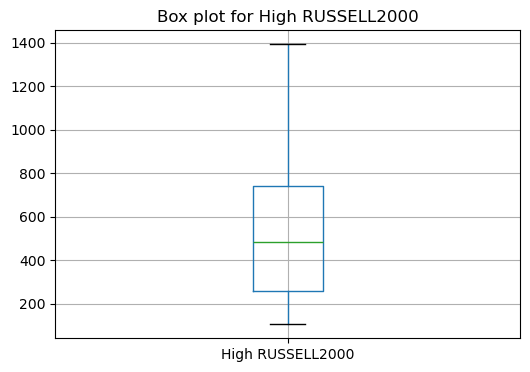

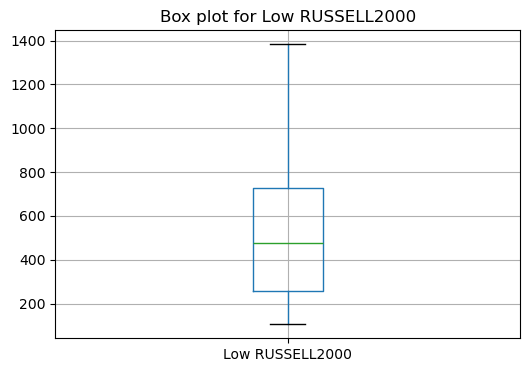

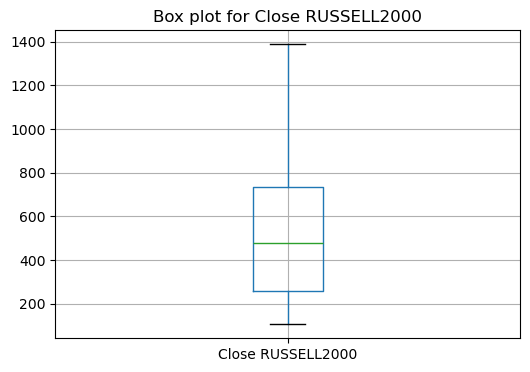

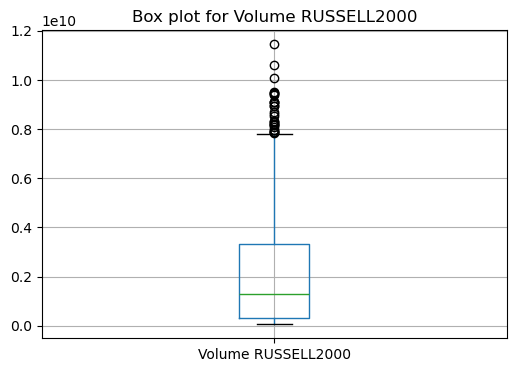

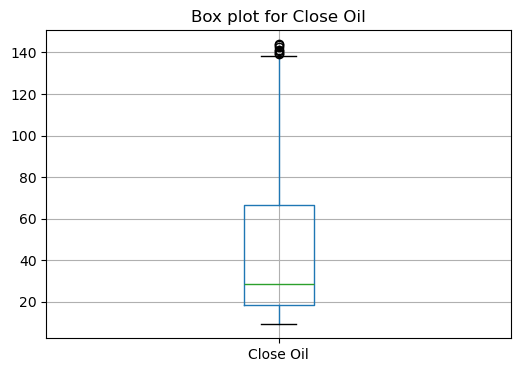

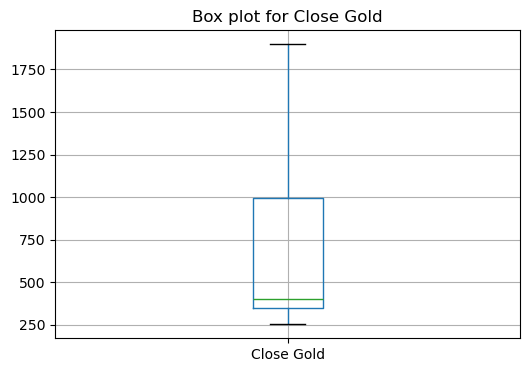

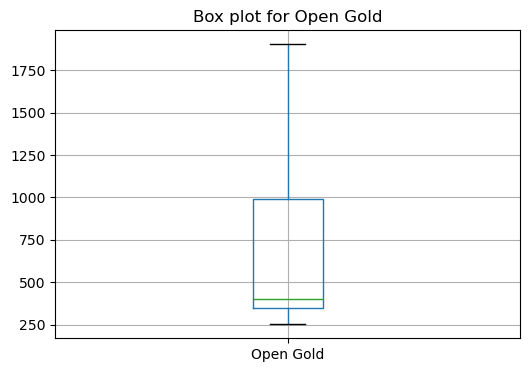

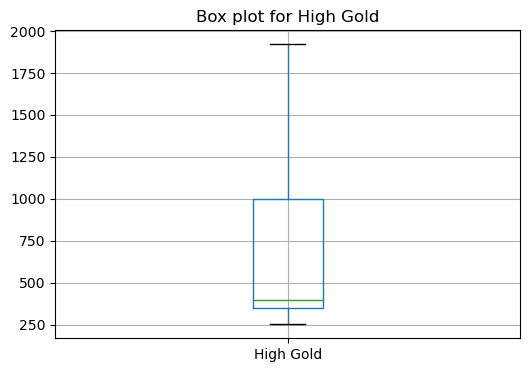

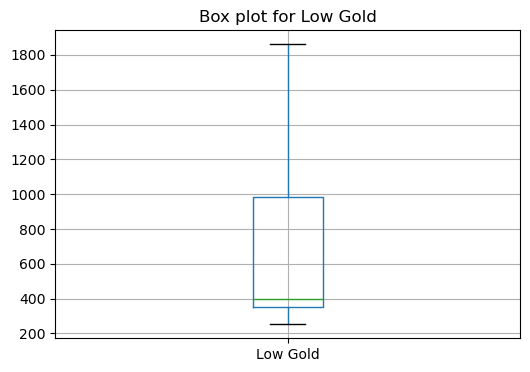

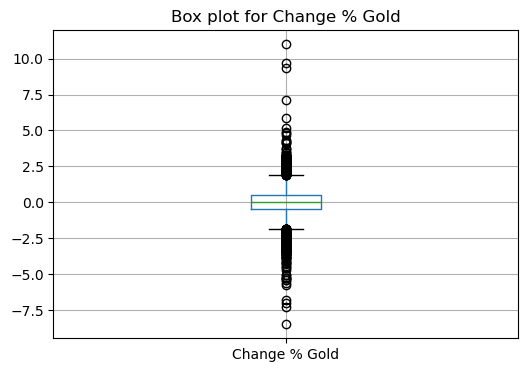

In [12]:
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    df_1987_2017.boxplot(column=[col])
    plt.title(f'Box plot for {col}')
    plt.show()

Comment something about the outliers

## Data correlation
Let's take a look of the initial correlation of our data.

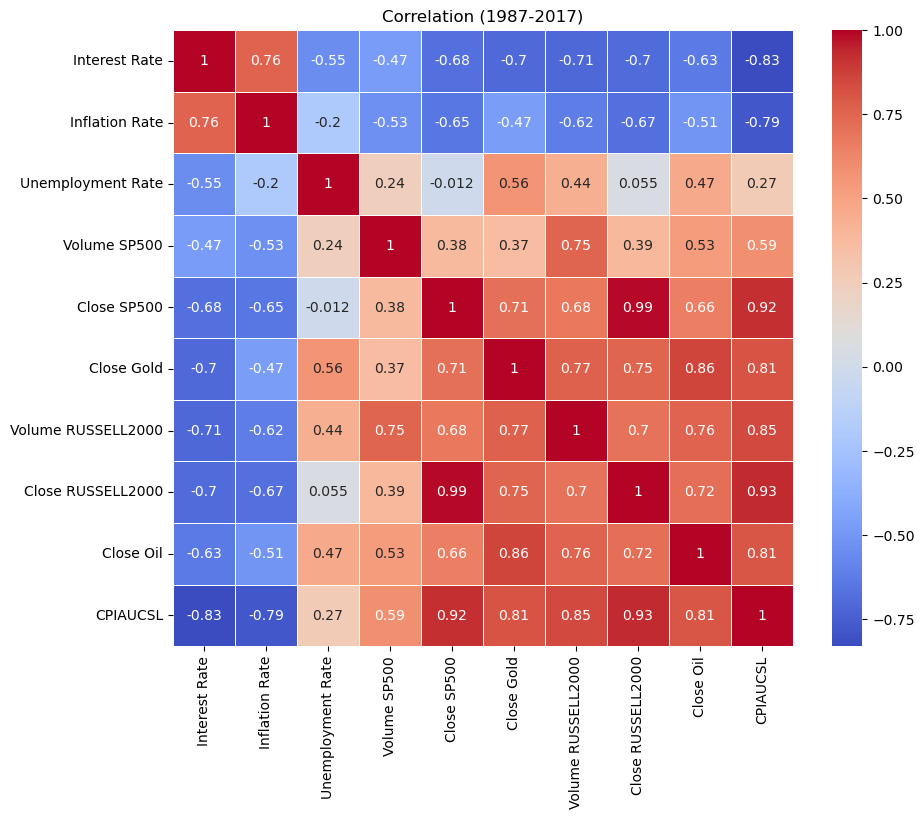

In [13]:
plt.figure(figsize=(10, 8))
corrmatt_1987_2017 = df_1987_2017[['Interest Rate', 'Inflation Rate', 'Unemployment Rate', 'Volume SP500', 'Close SP500', 'Close Gold', 'Volume RUSSELL2000', 'Close RUSSELL2000', 'Close Oil', 'CPIAUCSL']].corr()
sns.heatmap(corrmatt_1987_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987-2017)')
plt.show()

Comment on the correlation

## Feature engineering - adding column with change values
We want to add column with the changes in Open and Close, and Low and High prices for our indexes.

In [14]:
# Calculate the difference between the Open and Close value on the same day
df_1987_2017['OPEN_CLOSE_CHANGE_%_SP500'] = (df_1987_2017['Close SP500'] - df_1987_2017['Open SP500']) / df_1987_2017['Open SP500']
df_1987_2017['OPEN_CLOSE_CHANGE_%_RUSSELL2000'] = (df_1987_2017['Close RUSSELL2000'] - df_1987_2017['Open RUSSELL2000']) / df_1987_2017['Open RUSSELL2000']
df_1987_2017['OPEN_CLOSE_CHANGE_%_Gold'] = (df_1987_2017['Close Gold'] - df_1987_2017['Open Gold']) / df_1987_2017['Open Gold']
# Calculate the difference between the Low and High value on the same day
df_1987_2017['LOW_HIGH_CHANGE_%_SP500'] = (df_1987_2017['High SP500'] - df_1987_2017['Low SP500']) / df_1987_2017['Low SP500']
df_1987_2017['LOW_HIGH_CHANGE_%_RUSSELL2000'] = (df_1987_2017['High RUSSELL2000'] - df_1987_2017['Low RUSSELL2000']) / df_1987_2017['Low RUSSELL2000']
df_1987_2017['LOW_HIGH_CHANGE_%_Gold'] = (df_1987_2017['High Gold'] - df_1987_2017['Low Gold']) / df_1987_2017['Low Gold']

# Calculate other changes PERCENT OR ABS??????
df_1987_2017['Interest_Rate_Change'] = df_1987_2017['Interest Rate'].diff()
df_1987_2017['Inflation_Rate_Change'] = df_1987_2017['Inflation Rate'].diff()
df_1987_2017['Unemployment_Rate_Change'] = df_1987_2017['Unemployment Rate'].diff()
df_1987_2017['CPI_Change'] = df_1987_2017['CPIAUCSL'].diff()

# Volume changes
df_1987_2017['VOLUME_CHANGE_%_RUSSELL2000'] = df_1987_2017['Volume RUSSELL2000'].pct_change()
df_1987_2017['VOLUME_CHANGE_%_SP500'] = df_1987_2017['Volume SP500'].pct_change()




### As the features Open, Close, High, Low for each stock have a correlation value of 1 we only keep the close for further investigation.

In [15]:
df_1987_2017.columns

Index(['Close SP500', 'Open SP500', 'High SP500', 'Low SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold', 'Date',
       'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_%_Gold', 'LOW_HIGH_CHANGE_%_SP500',
       'LOW_HIGH_CHANGE_%_RUSSELL2000', 'LOW_HIGH_CHANGE_%_Gold',
       'Interest_Rate_Change', 'Inflation_Rate_Change',
       'Unemployment_Rate_Change', 'CPI_Change', 'VOLUME_CHANGE_%_RUSSELL2000',
       'VOLUME_CHANGE_%_SP500'],
      dtype='object')

In [16]:
df_1987_2017 = df_1987_2017[['Date','Close SP500', #'Open SP500', 'High SP500', 'Low SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       #'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', #'Volume RUSSELL2000', 
       'Close Oil', 'Close Gold',
       #'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold',
       'OPEN_CLOSE_CHANGE_%_SP500', 'OPEN_CLOSE_CHANGE_%_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_%_Gold', 'LOW_HIGH_CHANGE_%_SP500',
       'LOW_HIGH_CHANGE_%_RUSSELL2000', 'LOW_HIGH_CHANGE_%_Gold',
       'Interest_Rate_Change', 'Inflation_Rate_Change',
       'Unemployment_Rate_Change', 'CPI_Change', 'VOLUME_CHANGE_%_RUSSELL2000',
       'VOLUME_CHANGE_%_SP500']]

In [17]:
df_1987_2017

,Date,Close SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Close RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,...,OPEN_CLOSE_CHANGE_%_Gold,LOW_HIGH_CHANGE_%_SP500,LOW_HIGH_CHANGE_%_RUSSELL2000,LOW_HIGH_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,VOLUME_CHANGE_%_RUSSELL2000,VOLUME_CHANGE_%_SP500
0,1987-10-01,9.135417,7.29,6.0,4.3,115.000,171.399994,18.50,453.46,0.134203,...,-0.004850,0.025712,0.006755,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1987-10-02,9.175296,7.29,6.0,4.3,115.000,172.080002,18.65,454.87,0.123933,...,-0.001208,0.021169,0.004026,0.000000,0.0,0.0,0.0,0.0,-0.021222,0.051215
2,1987-10-05,9.175669,7.29,6.0,4.3,115.000,172.539993,18.78,456.83,0.120098,...,-0.000416,0.020991,0.002673,0.000000,0.0,0.0,0.0,0.0,-0.155473,-0.012085
3,1987-10-06,8.993629,7.29,6.0,4.3,115.000,170.210007,18.60,457.02,0.100740,...,-0.003337,0.029157,0.014636,0.000000,0.0,0.0,0.0,0.0,0.099562,0.121146
4,1987-10-07,8.971139,7.29,6.0,4.3,115.000,168.869995,18.58,457.63,0.119290,...,-0.003875,0.023689,0.010268,0.000000,0.0,0.0,0.0,0.0,0.060934,-0.018206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2016-12-23,83.971982,0.54,4.7,2.2,242.637,1371.510010,53.93,1133.49,0.002607,...,0.004075,0.011710,0.006568,0.007038,0.0,0.0,0.0,0.0,-0.297523,-0.274740
7496,2016-12-27,84.235925,0.54,4.7,2.2,242.637,1377.709961,53.93,1139.35,0.001277,...,0.004665,0.011476,0.007575,0.015576,0.0,0.0,0.0,0.0,-0.016565,0.326692
7497,2016-12-28,83.446216,0.54,4.7,2.2,242.637,1360.829956,54.95,1142.45,-0.010382,...,0.002466,0.016095,0.014751,0.007303,0.0,0.0,0.0,0.0,0.203958,0.549454
7498,2016-12-29,83.529571,0.54,4.7,2.2,242.637,1363.180054,54.97,1158.32,0.000490,...,0.013944,0.012464,0.007411,0.016453,0.0,0.0,0.0,0.0,-0.023404,-0.056082


In [18]:
df_1987_2017.isnull().sum()

Date                               0
Close SP500                        0
Interest Rate                      0
Unemployment Rate                  0
Inflation Rate                     0
CPIAUCSL                           0
Close RUSSELL2000                  0
Close Oil                          0
Close Gold                         0
OPEN_CLOSE_CHANGE_%_SP500          0
OPEN_CLOSE_CHANGE_%_RUSSELL2000    0
OPEN_CLOSE_CHANGE_%_Gold           0
LOW_HIGH_CHANGE_%_SP500            0
LOW_HIGH_CHANGE_%_RUSSELL2000      0
LOW_HIGH_CHANGE_%_Gold             0
Interest_Rate_Change               1
Inflation_Rate_Change              1
Unemployment_Rate_Change           1
CPI_Change                         1
VOLUME_CHANGE_%_RUSSELL2000        1
VOLUME_CHANGE_%_SP500              1
dtype: int64

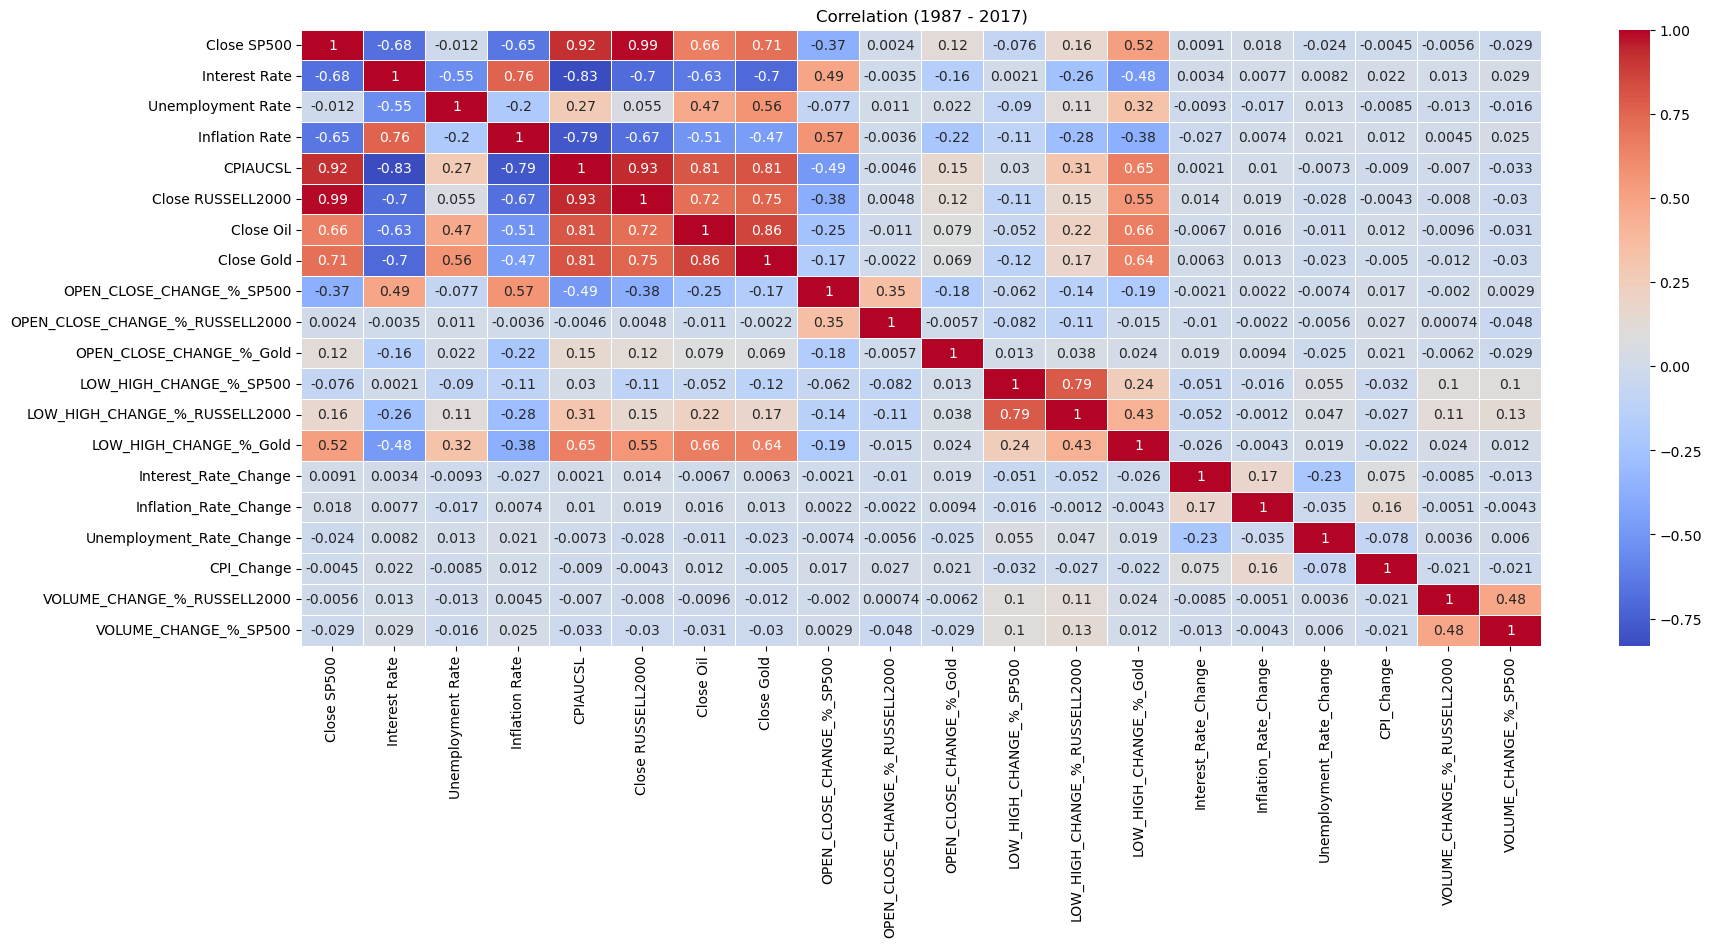

In [19]:
plt.figure(figsize=(20, 8))
corrmatt_after_1987_till_2017 = df_1987_2017.drop(columns=['Date']).corr()
sns.heatmap(corrmatt_after_1987_till_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987 - 2017)')
plt.show()

In [20]:
corrmatt_after_1987_till_2017

,Close SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Close RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,OPEN_CLOSE_CHANGE_%_RUSSELL2000,OPEN_CLOSE_CHANGE_%_Gold,LOW_HIGH_CHANGE_%_SP500,LOW_HIGH_CHANGE_%_RUSSELL2000,LOW_HIGH_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,VOLUME_CHANGE_%_RUSSELL2000,VOLUME_CHANGE_%_SP500
Close SP500,1.000000,-0.679878,-0.012440,-0.648387,0.915786,0.990031,0.655182,0.710925,-0.371029,0.002367,0.118297,-0.075578,0.163547,0.517580,0.009136,0.017954,-0.023953,-0.004491,-0.005612,-0.028730
Interest Rate,-0.679878,1.000000,-0.546242,0.760278,-0.830035,-0.697935,-0.630644,-0.702853,0.490892,-0.003494,-0.156975,0.002079,-0.263152,-0.481575,0.003413,0.007675,0.008192,0.021954,0.013262,0.029344
Unemployment Rate,-0.012440,-0.546242,1.000000,-0.198213,0.267451,0.054648,0.465941,0.563940,-0.076677,0.010863,0.021782,-0.089900,0.108380,0.322089,-0.009328,-0.016901,0.013489,-0.008483,-0.013210,-0.015942
Inflation Rate,-0.648387,0.760278,-0.198213,1.000000,-0.786780,-0.673141,-0.511188,-0.471404,0.565590,-0.003605,-0.215993,-0.106816,-0.280073,-0.378552,-0.026848,0.007372,0.021426,0.012280,0.004514,0.024894
CPIAUCSL,0.915786,-0.830035,0.267451,-0.786780,1.000000,0.932479,0.806297,0.807938,-0.488057,-0.004599,0.153907,0.029671,0.305438,0.651221,0.002134,0.010236,-0.007276,-0.009017,-0.006971,-0.033341
Close RUSSELL2000,0.990031,-0.697935,0.054648,-0.673141,0.932479,1.000000,0.717119,0.753198,-0.379993,0.004752,0.121721,-0.105534,0.152007,0.550837,0.013941,0.019325,-0.027852,-0.004269,-0.008024,-0.030199
Close Oil,0.655182,-0.630644,0.465941,-0.511188,0.806297,0.717119,1.000000,0.862295,-0.252470,-0.010886,0.078991,-0.051536,0.220480,0.658347,-0.006741,0.015932,-0.010817,0.011772,-0.009585,-0.031073
Close Gold,0.710925,-0.702853,0.563940,-0.471404,0.807938,0.753198,0.862295,1.000000,-0.165689,-0.002222,0.068572,-0.120885,0.170930,0.643694,0.006316,0.013333,-0.022742,-0.004990,-0.012464,-0.029884
OPEN_CLOSE_CHANGE_%_SP500,-0.371029,0.490892,-0.076677,0.565590,-0.488057,-0.379993,-0.252470,-0.165689,1.000000,0.349627,-0.175934,-0.061665,-0.143518,-0.188434,-0.002149,0.002183,-0.007424,0.016506,-0.002012,0.002920
OPEN_CLOSE_CHANGE_%_RUSSELL2000,0.002367,-0.003494,0.010863,-0.003605,-0.004599,0.004752,-0.010886,-0.002222,0.349627,1.000000,-0.005746,-0.082383,-0.105708,-0.014584,-0.010291,-0.002166,-0.005613,0.026948,0.000735,-0.047596


In [21]:
df_1987_2017.bfill()

,Date,Close SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Close RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,...,OPEN_CLOSE_CHANGE_%_Gold,LOW_HIGH_CHANGE_%_SP500,LOW_HIGH_CHANGE_%_RUSSELL2000,LOW_HIGH_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,VOLUME_CHANGE_%_RUSSELL2000,VOLUME_CHANGE_%_SP500
0,1987-10-01,9.135417,7.29,6.0,4.3,115.000,171.399994,18.50,453.46,0.134203,...,-0.004850,0.025712,0.006755,0.000000,0.0,0.0,0.0,0.0,-0.021222,0.051215
1,1987-10-02,9.175296,7.29,6.0,4.3,115.000,172.080002,18.65,454.87,0.123933,...,-0.001208,0.021169,0.004026,0.000000,0.0,0.0,0.0,0.0,-0.021222,0.051215
2,1987-10-05,9.175669,7.29,6.0,4.3,115.000,172.539993,18.78,456.83,0.120098,...,-0.000416,0.020991,0.002673,0.000000,0.0,0.0,0.0,0.0,-0.155473,-0.012085
3,1987-10-06,8.993629,7.29,6.0,4.3,115.000,170.210007,18.60,457.02,0.100740,...,-0.003337,0.029157,0.014636,0.000000,0.0,0.0,0.0,0.0,0.099562,0.121146
4,1987-10-07,8.971139,7.29,6.0,4.3,115.000,168.869995,18.58,457.63,0.119290,...,-0.003875,0.023689,0.010268,0.000000,0.0,0.0,0.0,0.0,0.060934,-0.018206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2016-12-23,83.971982,0.54,4.7,2.2,242.637,1371.510010,53.93,1133.49,0.002607,...,0.004075,0.011710,0.006568,0.007038,0.0,0.0,0.0,0.0,-0.297523,-0.274740
7496,2016-12-27,84.235925,0.54,4.7,2.2,242.637,1377.709961,53.93,1139.35,0.001277,...,0.004665,0.011476,0.007575,0.015576,0.0,0.0,0.0,0.0,-0.016565,0.326692
7497,2016-12-28,83.446216,0.54,4.7,2.2,242.637,1360.829956,54.95,1142.45,-0.010382,...,0.002466,0.016095,0.014751,0.007303,0.0,0.0,0.0,0.0,0.203958,0.549454
7498,2016-12-29,83.529571,0.54,4.7,2.2,242.637,1363.180054,54.97,1158.32,0.000490,...,0.013944,0.012464,0.007411,0.016453,0.0,0.0,0.0,0.0,-0.023404,-0.056082


### Analysing trends
We will now have a look at the trends by looking grouping every year and aggregate the mean

In [22]:
# 1. Konverter 'Date' kolonnen til datetime format, hvis det ikke allerede er gjort
df_1987_2017['Date'] = pd.to_datetime(df_1987_2017['Date'])

# 2. Opret en ny kolonne, der indeholder årstallet
df_1987_2017['Year'] = df_1987_2017['Date'].dt.year

# 3. Gruppér dataene efter år og beregn gennemsnittet for hver kolonne
df_grouped_by_year = df_1987_2017.drop(columns='Date').groupby('Year').mean()

# 4. Flyt 'Year' fra index til en almindelig kolonne
df_grouped_by_year = df_grouped_by_year.reset_index()

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_69193/4011429658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1987_2017['Date'] = pd.to_datetime(df_1987_2017['Date'])
/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_69193/4011429658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1987_2017['Year'] = df_1987_2017['Date'].dt.year


In [32]:
# df_grouped_by_year.to_csv('data_1987-2017_yearly.csv')

In [23]:
# 4. Udskriv det første par rækker for at tjekke resultatet
df_grouped_by_year.head(32)

,Year,Close SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Close RUSSELL2000,Close Oil,Close Gold,OPEN_CLOSE_CHANGE_%_SP500,...,OPEN_CLOSE_CHANGE_%_Gold,LOW_HIGH_CHANGE_%_SP500,LOW_HIGH_CHANGE_%_RUSSELL2000,LOW_HIGH_CHANGE_%_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change,VOLUME_CHANGE_%_RUSSELL2000,VOLUME_CHANGE_%_SP500
0,1987,7.213819,6.920154,5.833846,4.298462,115.332308,125.307231,17.882000,473.075385,0.110678,...,-0.006042,0.041918,0.024501,0.000000,-0.008125,-0.001562,-0.004687,0.009375,0.045561,0.069570
1,1988,7.429952,7.567977,5.493385,4.416732,118.276265,142.184358,14.941790,436.706031,0.069610,...,-0.005979,0.020896,0.006415,0.000000,0.007743,0.001946,-0.001556,0.019844,0.027237,0.042097
2,1989,8.580726,9.220234,5.257422,4.514453,123.945312,166.529375,18.258594,381.071172,0.056683,...,-0.006087,0.017928,0.005414,0.000000,-0.001211,-0.001172,0.000391,0.021875,0.023742,0.052231
3,1990,8.655580,8.100233,5.616279,5.017829,130.661240,150.253450,23.701938,383.751008,0.023761,...,-0.008057,0.021722,0.008202,0.000000,-0.004419,0.003101,0.003488,0.030620,0.018787,0.038739
4,1991,9.802418,5.687393,6.850584,4.894553,136.176265,169.762607,20.084591,362.381829,0.015876,...,-0.005629,0.021058,0.008171,0.000000,-0.011206,-0.003113,0.003891,0.015564,0.026943,0.043261
5,1992,10.801761,3.520965,7.490734,3.650965,140.307336,199.373938,19.300965,344.016448,0.000576,...,-0.001979,0.019709,0.007223,0.000000,-0.005830,-0.004247,0.000386,0.015830,0.015448,0.031384
6,1993,12.180714,3.022695,6.905469,3.306250,144.485547,237.196719,17.039219,360.280977,0.000242,...,0.000758,0.019867,0.005677,0.000000,0.000156,-0.000391,-0.003516,0.015625,0.016840,0.034200
7,1994,12.271179,4.203867,6.098047,2.851562,148.230469,252.444179,15.815039,384.301133,-0.000088,...,-0.000056,0.020400,0.006586,0.000000,0.009727,-0.002344,-0.003906,0.014844,0.019456,0.029528
8,1995,14.202381,5.836133,5.591016,2.991016,152.383594,282.584531,17.022773,384.257187,0.001091,...,-0.000024,0.019607,0.005852,0.000000,0.000586,0.001562,0.000391,0.014844,0.021340,0.040952
9,1996,16.938402,5.300000,5.407752,2.716667,156.860853,337.000077,20.639070,387.759884,0.000548,...,-0.000208,0.021307,0.007016,0.000000,-0.001202,-0.001550,-0.000775,0.020155,0.045916,0.041830


In [24]:
df_grouped_by_year.columns

Index(['Year', 'Close SP500', 'Interest Rate', 'Unemployment Rate',
       'Inflation Rate', 'CPIAUCSL', 'Close RUSSELL2000', 'Close Oil',
       'Close Gold', 'OPEN_CLOSE_CHANGE_%_SP500',
       'OPEN_CLOSE_CHANGE_%_RUSSELL2000', 'OPEN_CLOSE_CHANGE_%_Gold',
       'LOW_HIGH_CHANGE_%_SP500', 'LOW_HIGH_CHANGE_%_RUSSELL2000',
       'LOW_HIGH_CHANGE_%_Gold', 'Interest_Rate_Change',
       'Inflation_Rate_Change', 'Unemployment_Rate_Change', 'CPI_Change',
       'VOLUME_CHANGE_%_RUSSELL2000', 'VOLUME_CHANGE_%_SP500'],
      dtype='object')

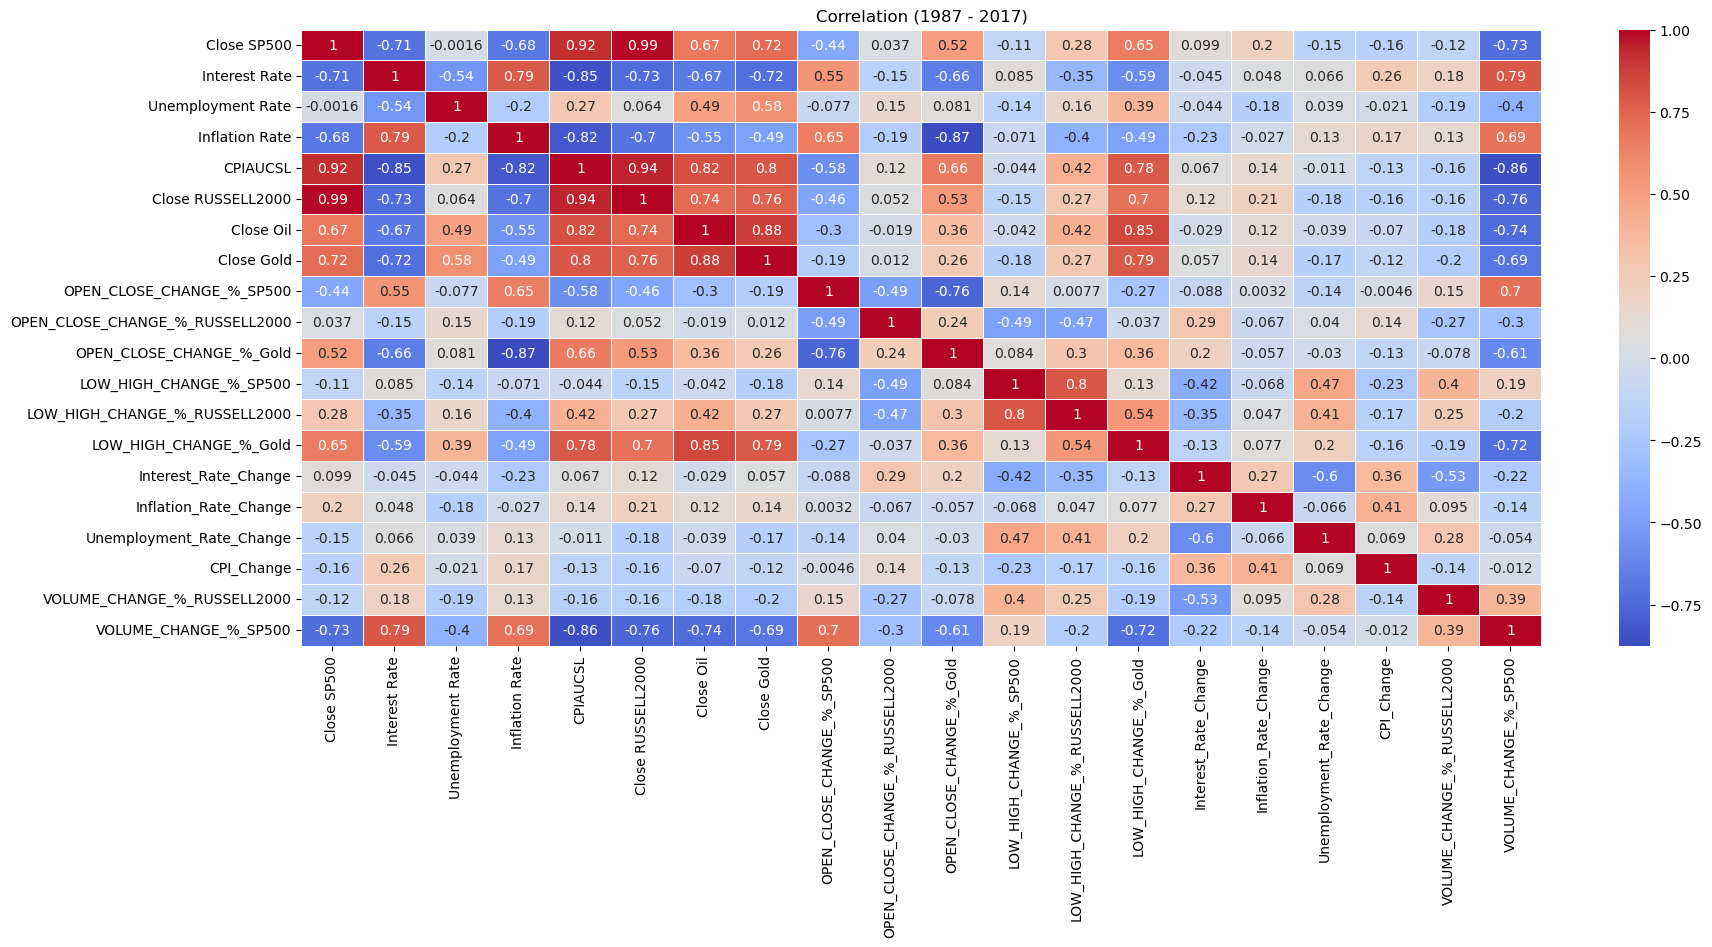

In [25]:
plt.figure(figsize=(20, 8))
corrmatt_after_1987_till_2017 = df_grouped_by_year.drop(columns=['Year']).corr()
sns.heatmap(corrmatt_after_1987_till_2017, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987 - 2017)')
plt.show()

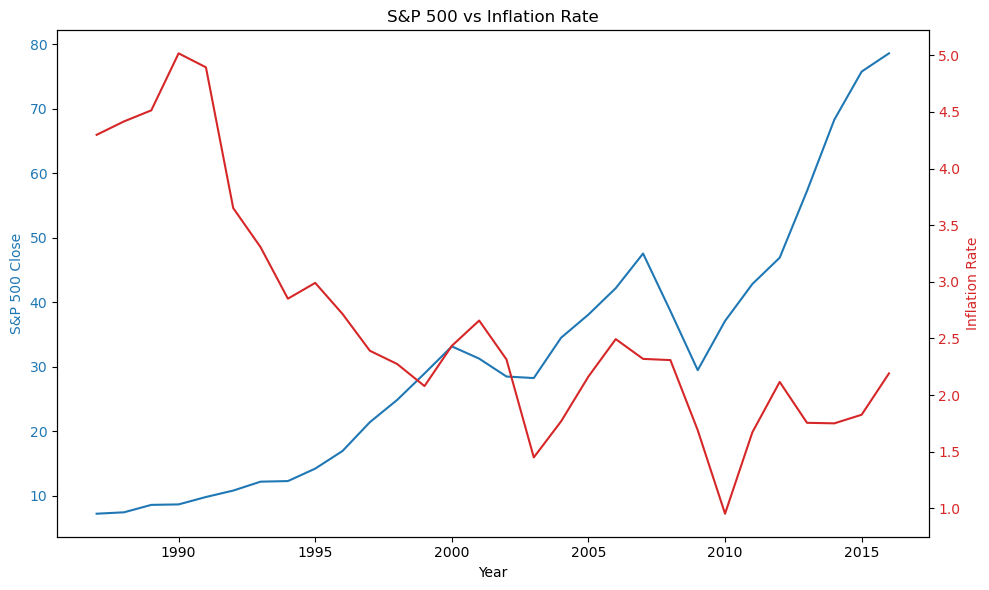

In [26]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Year')
ax1.set_ylabel('S&P 500 Close', color='tab:blue')
ax1.plot(df_grouped_by_year['Year'], df_grouped_by_year['Close SP500'], color='tab:blue', label='S&P 500 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Inflation Rate', color='tab:red')
ax2.plot(df_grouped_by_year['Year'], df_grouped_by_year['Inflation Rate'], color='tab:red', label='Inflation Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('S&P 500 vs Inflation Rate')
fig.tight_layout()
plt.show()

### Now lets have a look at the trend before during and after the Crisis back in 2008. We will analyse both gold and sp500 with inflation

In [38]:
pre_crisis.reset_index().to_csv('pre_crisis.csv')
during_crisis.to_csv('during_crisis.csv')
post_crisis.to_csv('post_crisis.csv')

In [ ]:
# 1. Filtrér data for hver periode
pre_crisis = df_grouped_by_year[(df_grouped_by_year['Year'] >= 1987) & (df_grouped_by_year['Year'] <= 2006)]
during_crisis = df_grouped_by_year[(df_grouped_by_year['Year'] >= 2007) & (df_grouped_by_year['Year'] <= 2009)]
post_crisis = df_grouped_by_year[(df_grouped_by_year['Year'] >= 2010) & (df_grouped_by_year['Year'] <= 2017)]

pre_crisis.reset_index().to_csv('pre_crisis.csv')
during_crisis.to_csv('during_crisis.csv')
post_crisis.to_csv('post_crisis.csv')

# 2. Lav plot for hver periode

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Pre crisis
axes[0].plot(pre_crisis['Year'], pre_crisis['Close SP500'], color='blue', label='S&P 500 Close')
axes[0].set_ylabel('S&P 500 Close')
axes[0].set_title('S&P 500 vs Inflation Rate (1987-2006)')
axes[0].tick_params(axis='y', labelcolor='blue')

ax2_0 = axes[0].twinx()
ax2_0.plot(pre_crisis['Year'], pre_crisis['Inflation Rate'], color='red', label='Inflation Rate')
ax2_0.set_ylabel('Inflation Rate')
ax2_0.tick_params(axis='y', labelcolor='red')

# During Crisis
axes[1].plot(during_crisis['Year'], during_crisis['Close SP500'], color='blue', label='S&P 500 Close')
axes[1].set_ylabel('S&P 500 Close')
axes[1].set_title('S&P 500 vs Inflation Rate (2007-2009)')
axes[1].tick_params(axis='y', labelcolor='blue')

ax2_1 = axes[1].twinx()
ax2_1.plot(during_crisis['Year'], during_crisis['Inflation Rate'], color='red', label='Inflation Rate')
ax2_1.set_ylabel('Inflation Rate')
ax2_1.tick_params(axis='y', labelcolor='red')

# After crisis
axes[2].plot(post_crisis['Year'], post_crisis['Close SP500'], color='blue', label='S&P 500 Close')
axes[2].set_ylabel('S&P 500 Close')
axes[2].set_title('S&P 500 vs Inflation Rate (2010-2017)')
axes[2].tick_params(axis='y', labelcolor='blue')

ax2_2 = axes[2].twinx()
ax2_2.plot(post_crisis['Year'], post_crisis['Inflation Rate'], color='red', label='Inflation Rate')
ax2_2.set_ylabel('Inflation Rate')
ax2_2.tick_params(axis='y', labelcolor='red')

# Justér layout
plt.tight_layout()
plt.show()

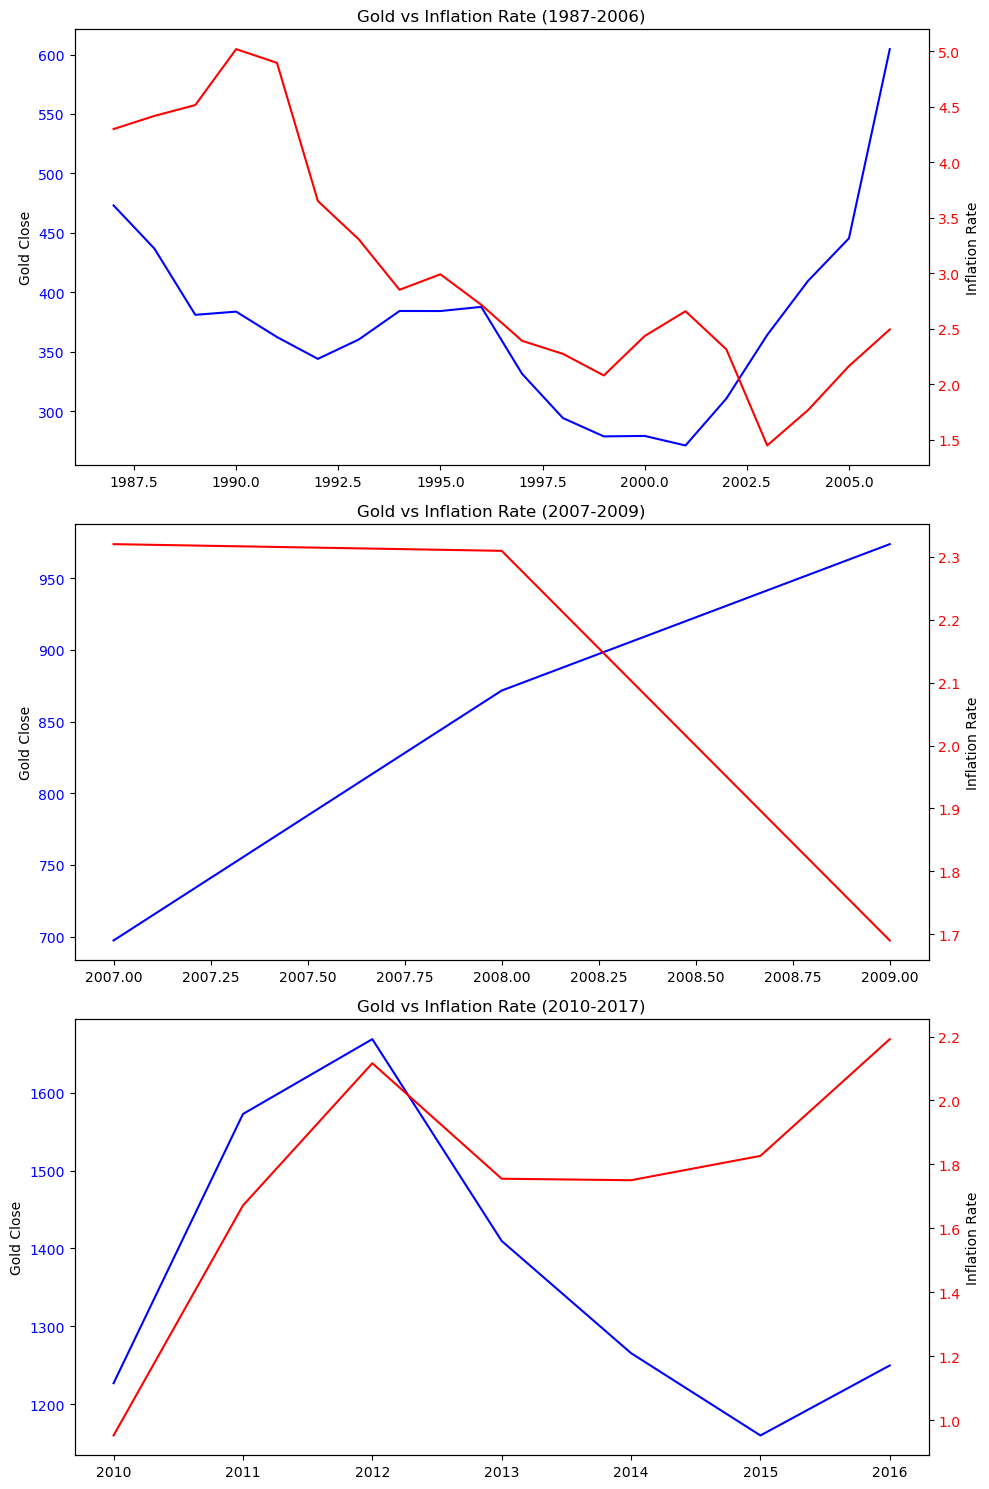

In [28]:
# 2. Lav plot for hver periode
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Pre crisis
axes[0].plot(pre_crisis['Year'], pre_crisis['Close Gold'], color='blue', label='Gold Close')
axes[0].set_ylabel('Gold Close')
axes[0].set_title('Gold vs Inflation Rate (1987-2006)')
axes[0].tick_params(axis='y', labelcolor='blue')

ax2_0 = axes[0].twinx()
ax2_0.plot(pre_crisis['Year'], pre_crisis['Inflation Rate'], color='red', label='Inflation Rate')
ax2_0.set_ylabel('Inflation Rate')
ax2_0.tick_params(axis='y', labelcolor='red')

# During Crisis
axes[1].plot(during_crisis['Year'], during_crisis['Close Gold'], color='blue', label='Gold Close')
axes[1].set_ylabel('Gold Close')
axes[1].set_title('Gold vs Inflation Rate (2007-2009)')
axes[1].tick_params(axis='y', labelcolor='blue')

ax2_1 = axes[1].twinx()
ax2_1.plot(during_crisis['Year'], during_crisis['Inflation Rate'], color='red', label='Inflation Rate')
ax2_1.set_ylabel('Inflation Rate')
ax2_1.tick_params(axis='y', labelcolor='red')

# After crisis
axes[2].plot(post_crisis['Year'], post_crisis['Close Gold'], color='blue', label='Gold Close')
axes[2].set_ylabel('Gold Close')
axes[2].set_title('Gold vs Inflation Rate (2010-2017)')
axes[2].tick_params(axis='y', labelcolor='blue')

ax2_2 = axes[2].twinx()
ax2_2.plot(post_crisis['Year'], post_crisis['Inflation Rate'], color='red', label='Inflation Rate')
ax2_2.set_ylabel('Inflation Rate')
ax2_2.tick_params(axis='y', labelcolor='red')

# Justér layout
plt.tight_layout()
plt.show()

# 5. Data Modeling

Now we enter the step where we will train a model based on the data we have. We will train a model to predict future prices of SP500 based on tha features we have.

In [29]:
# 2. Definér X og y
X = df_1987_2017.drop(columns=['Close SP500','Date'])  # Alle kolonner bortset fra Close SP500
y = df_1987_2017['Close SP500']

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Træn model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Forudsig
y_pred = model.predict(X_test)

# 6. Evaluering
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R²:', r2_score(y_test, y_pred))

RMSE: 0.33519581052174535
R²: 0.9997044143509387


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


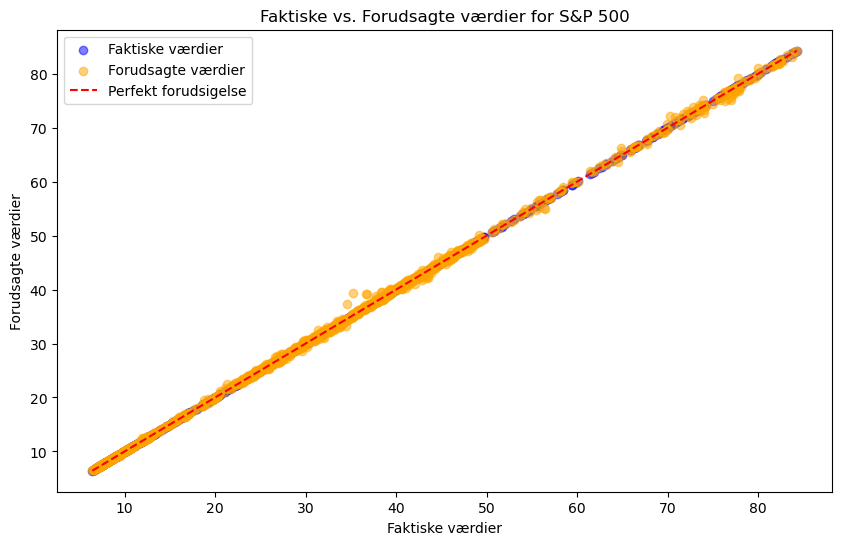

In [30]:
# Initialiser RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Split datasættet i trænings- og testdatasæt
X = df_1987_2017.drop(columns=['Close SP500', 'Date'])  # uafhængige variabler
y = df_1987_2017['Close SP500']  # afhængig variabel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Træn modellen
rf_model.fit(X_train, y_train)

# Gør forudsigelser
y_pred = rf_model.predict(X_test)

# Visualiser faktiske vs. forudsagte værdier
plt.figure(figsize=(10, 6))

# Scatter plot for faktiske værdier
plt.scatter(y_test, y_test, color='blue', label='Faktiske værdier', alpha=0.5)

# Scatter plot for forudsagte værdier
plt.scatter(y_test, y_pred, color='orange', label='Forudsagte værdier', alpha=0.5)

# Diagonal linje for perfekt forudsigelse
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfekt forudsigelse')

plt.xlabel('Faktiske værdier')
plt.ylabel('Forudsagte værdier')
plt.title('Faktiske vs. Forudsagte værdier for S&P 500')
plt.legend()
plt.show()

Now lets try with cross validation

In [31]:
# Antag, at df er dit DataFrame og 'Close SP500' er den afhængige variabel
X = df_1987_2017.drop(columns=['Close SP500','Date'])  # uafhængige variabler
y = df_1987_2017['Close SP500']  # afhængig variabel

# Initialiser RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Antal folds at teste
folds = [3, 5, 10, 15, 20]
results = []

# looping through array of fold quantity for check the best fold nr os best for cross validation
for n_folds in folds:
    cv_scores = cross_val_score(rf_model, X, y, cv=n_folds, scoring='neg_root_mean_squared_error')
    mean_rmse = np.mean(-cv_scores)
    results.append(mean_rmse)
    print(f'RMSE for {n_folds} folds: {mean_rmse}')

# Konvertere neg. MSE til RMSE
rmse_scores = np.sqrt(-cv_scores)

# Udskriv RMSE for hver fold
print("RMSE for hver fold:", rmse_scores)
print("Gennemsnitlig RMSE:", np.mean(rmse_scores))

# Træn modellen på hele datasættet
rf_model.fit(X, y)

# Gør forudsigelser
y_pred = rf_model.predict(X)

# Beregn R²
r2 = r2_score(y, y_pred)
print("R²:", r2)

RMSE for 3 folds: 10.340413341781222
RMSE for 5 folds: 7.2577033041751395
RMSE for 10 folds: 3.847026017645961
RMSE for 15 folds: 1.82195046004081
RMSE for 20 folds: 1.7588994320130695
RMSE for hver fold: [0.90477051 0.90097912 0.47823372 0.6925935  0.74999392 1.01749179
 1.35821349 1.06078963 1.35700635 1.16636945 1.11161658 1.12691681
 1.3507324  1.92219456 1.80557301 1.31579651 1.16037044 1.63835833
 1.74831945 2.22842631]
Gennemsnitlig RMSE: 1.2547372934038967
R²: 0.9999622165973746
